In [1]:
import lightningchart as lc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the CSV file
file_path = 'D:/wenprograming23/src/team6/Marine-Seismic-Data-Time-Series-Analysis-with-LightningChart-Python/Data/output.csv'
df = pd.read_csv(file_path)

# Convert sample number to time (assuming the sample interval is in microseconds)
df['time_ms'] = df['sample_number'] * df['sample_interval_in_ms_for_this_trace'] / 1000.0

# Create a Dashboard
dashboard = lc.Dashboard(
    rows=3,
    columns=3,
    theme=lc.Themes.Dark
)

# Plotting the first nine traces separately
unique_traces = df['trace_sequence_number_within_line'].unique()
for idx, trace in enumerate(unique_traces[:9]):  # Plot first 9 traces
    trace_data = df[df['trace_sequence_number_within_line'] == trace]
    chart = dashboard.ChartXY(
        column_index=idx % 3,
        row_index=idx // 3,
        row_span=1,
        column_span=1
    )
    chart.set_title(f'Trace {trace}')
    series = chart.add_line_series()
    series.add(trace_data['time_ms'].tolist(), trace_data['trace_value'].tolist())
    series.set_name(f'Trace {trace}')

    # Set axis labels
    chart.get_default_x_axis().set_title('Time (ms)')
    chart.get_default_y_axis().set_title('Amplitude')

# Open the dashboard
dashboard.open()

In [5]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the CSV file
file_path = 'D:/wenprograming23/src/team6/Marine-Seismic-Data-Time-Series-Analysis-with-LightningChart-Python/Data/output.csv'
df = pd.read_csv(file_path)

# Convert sample number to time (assuming the sample interval is in microseconds)
df['time_ms'] = df['sample_number'] * df['sample_interval_in_ms_for_this_trace'] / 1000.0

# Prepare data for line chart
unique_traces = df['trace_sequence_number_within_line'].unique()

# Create a Line Chart
chart = lc.ChartXY(
    theme=lc.Themes.Dark,
    title='Line Chart of Seismic Data (First 9 Traces)'
)

# Plotting the first 9 traces
for trace in unique_traces[:9]:
    trace_data = df[df['trace_sequence_number_within_line'] == trace]
    series = chart.add_line_series()
    series.add(trace_data['time_ms'].tolist(), trace_data['trace_value'].tolist())
    series.set_name(f'Trace {trace}')

chart.open()

127.0.0.1 - - [19/Jun/2024 08:25:10] "GET / HTTP/1.1" 200 -


In [7]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the CSV file
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project3/namss.F-12-89-HW.mcs.airgun/Data/output.csv'
df = pd.read_csv(file_path)

# Calculate histogram data
hist, bin_edges = np.histogram(df['trace_value'], bins=50)

# Prepare data for the bar chart
data = [{'category': f'{(bin_edges[i] + bin_edges[i + 1]) / 2:.2f}', 'value': int(hist[i])} for i in range(len(hist))]

# Create a Bar Chart
chart = lc.BarChart(
    vertical=True,
    theme=lc.Themes.Dark,
    title='Histogram of Seismic Trace Values'
)

# Set the data for the bar chart
chart.set_data(data)

# Show the chart
chart.open()

# Add axis titles using text boxes
x_axis_title = chart.add_textbox(text='Amplitude', x=50, y=95)
y_axis_title = chart.add_textbox(text='Frequency', x=5, y=50)


In the provided histogram, the x-values and y-values represent the following:

X-values (Amplitude): These values represent the midpoints of the bins of the histogram. Each bin covers a range of trace values (amplitudes) from the seismic data, and the x-value is the midpoint of that range. For example, an x-value of -0.02 indicates the midpoint of a bin that includes trace values around -0.02.

Y-values (Frequency): These values represent the number of occurrences (frequency) of trace values that fall within each bin's range. The height of each bar in the histogram corresponds to how many trace values are within that specific range. For instance, the first bin has a y-value of 30,731,895, indicating that there are 30,731,895 trace values within the range around the midpoint -0.02.

In [ ]:
import lightningchart as lc
import pandas as pd

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the CSV file
file_path = 'D:/wenprograming23/src/team6/Marine-Seismic-Data-Time-Series-Analysis-with-LightningChart-Python/Data/output.csv'
df = pd.read_csv(file_path)

# Convert sample number to time (assuming the sample interval is in microseconds)
df['time_ms'] = df['sample_number'] * df['sample_interval_in_ms_for_this_trace'] / 1000.0

# Create a Scatter Plot
chart = lc.ChartXY(
    theme=lc.Themes.Dark,
    title='Scatter Plot of Amplitude vs. Time'
)

# Add a Point Series for the scatter plot
point_series = chart.add_point_series()

# Set data for the point series
point_series.add(df['time_ms'].values.tolist(), df['trace_value'].values.tolist())

# Customize axis titles
chart.get_default_x_axis().set_title('Time (ms)')
chart.get_default_y_axis().set_title('Amplitude')

# Show the chart
chart.open()


127.0.0.1 - - [17/Jun/2024 21:15:51] "GET / HTTP/1.1" 200 -


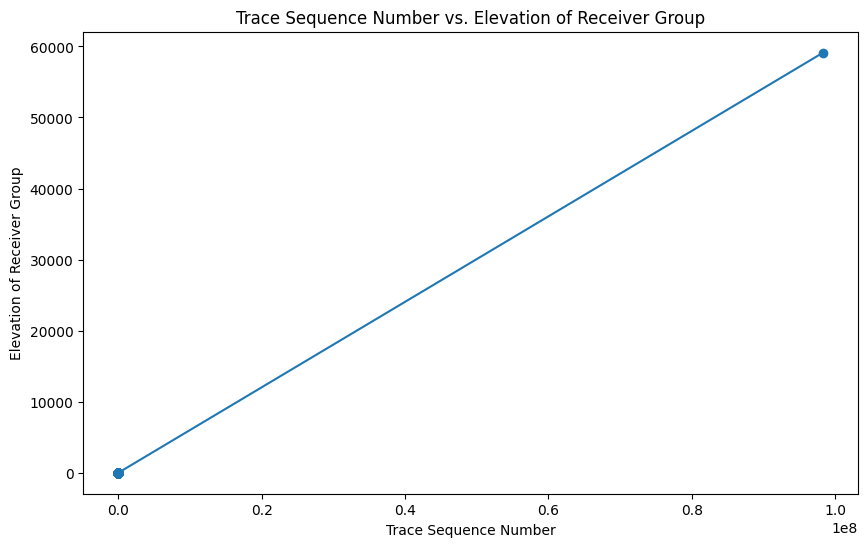

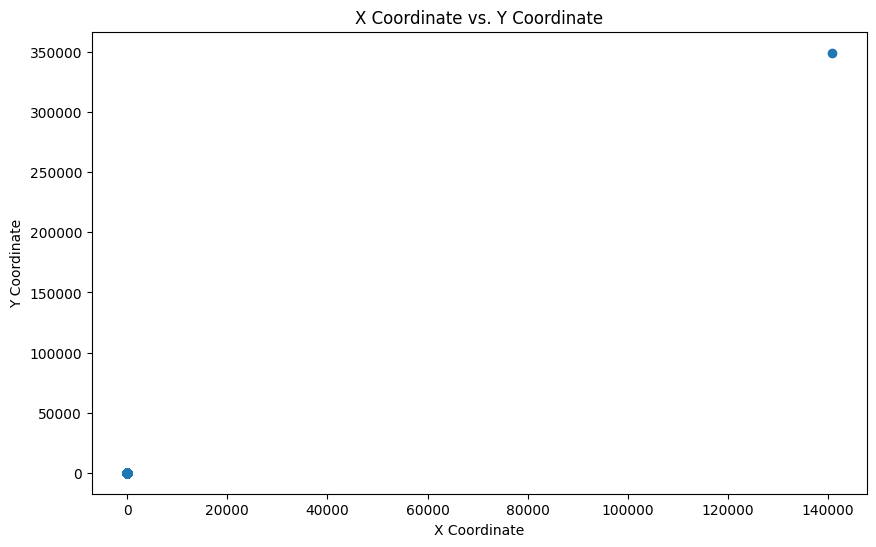

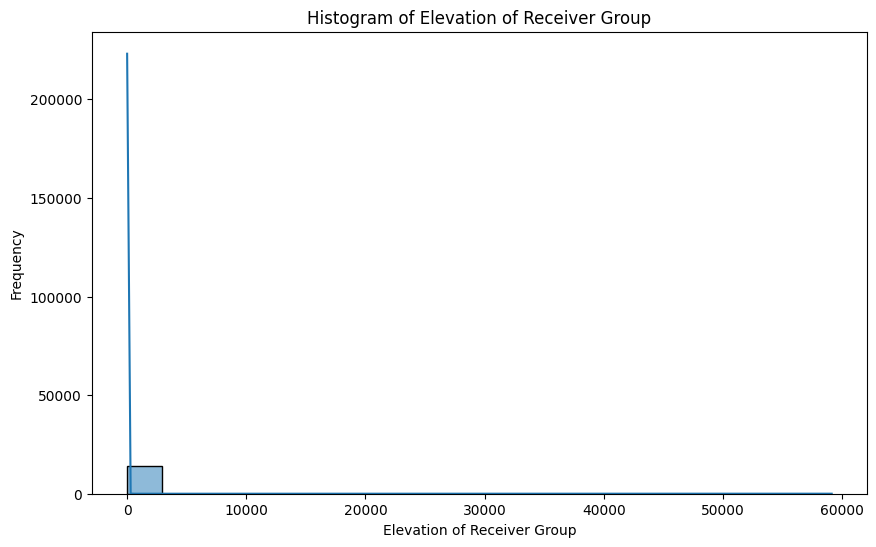

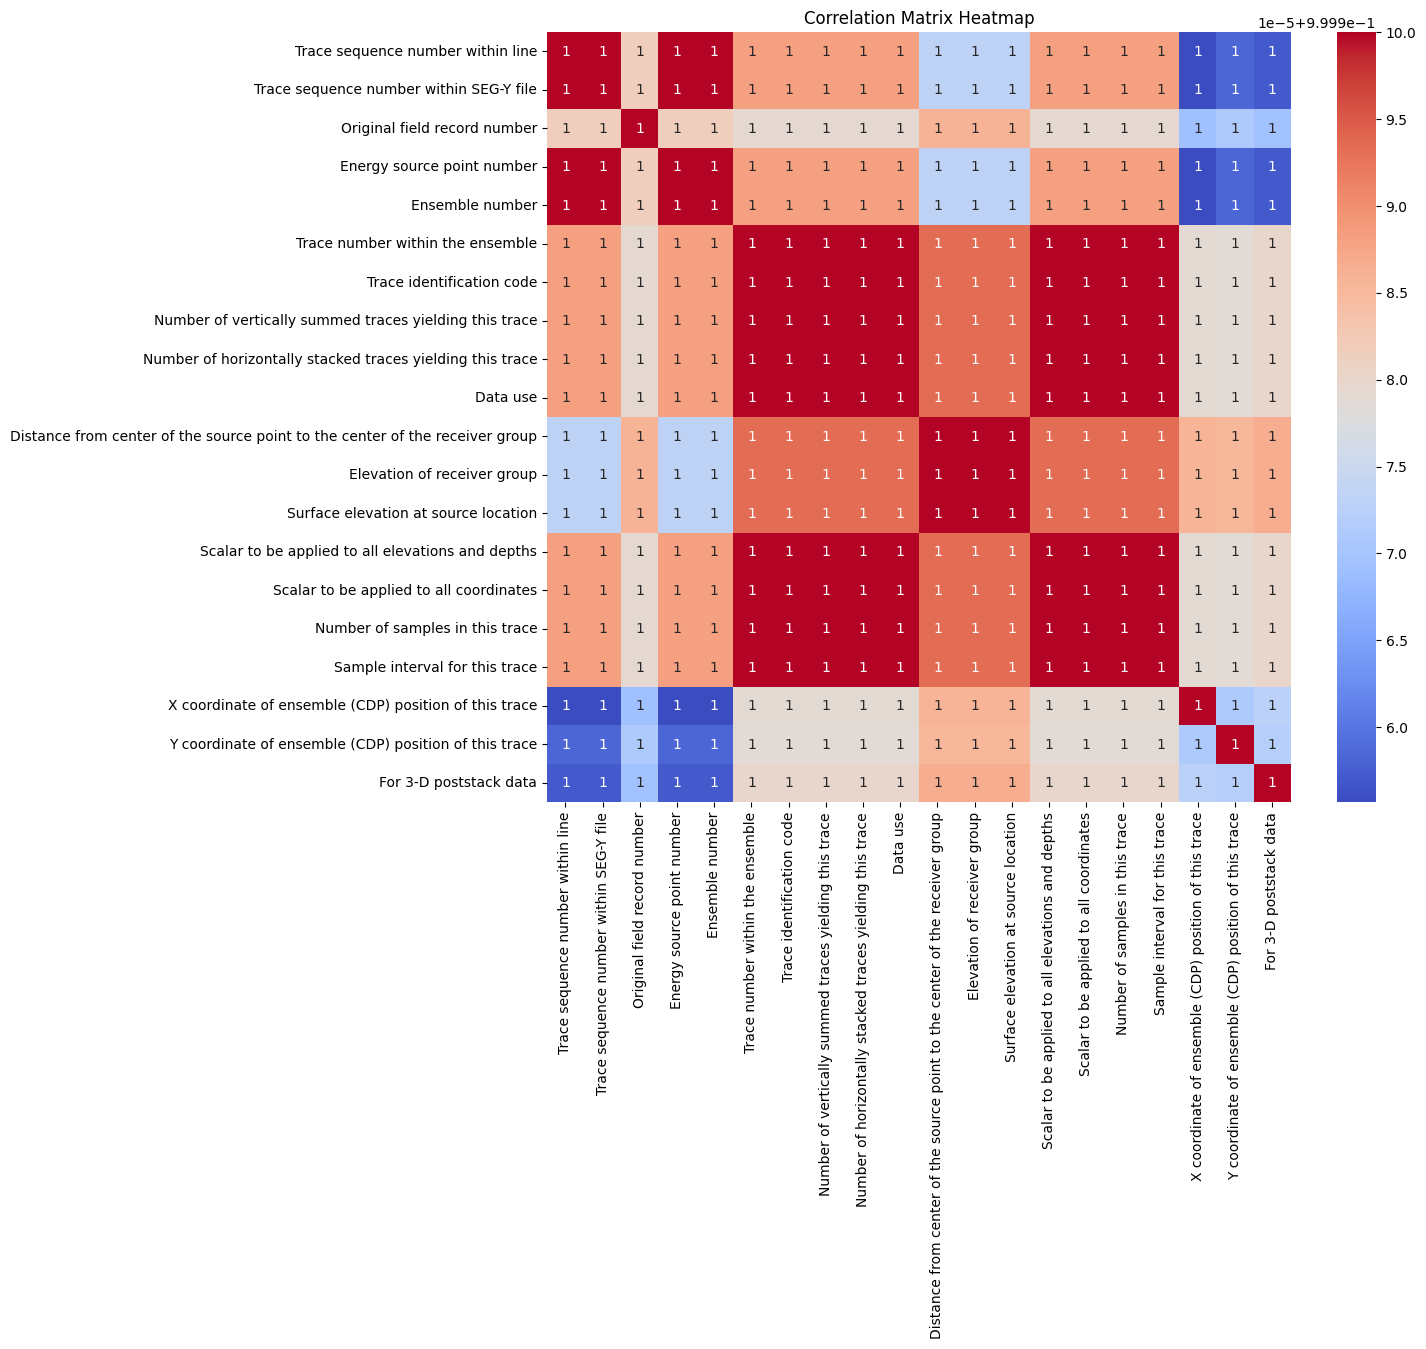

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel('D:/Computer Aplication/WorkPlacement/Projects/Project3/namss.F-12-89-HW.mcs.airgun/Data/TraceHeader.xlsx')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Trace Sequence Number vs. Elevation of Receiver Group
plt.figure(figsize=(10, 6))
plt.plot(df['Trace sequence number within line'], df['Elevation of receiver group'], marker='o')
plt.xlabel('Trace Sequence Number')
plt.ylabel('Elevation of Receiver Group')
plt.title('Trace Sequence Number vs. Elevation of Receiver Group')
plt.show()

# X Coordinate vs. Y Coordinate
plt.figure(figsize=(10, 6))
plt.scatter(df['X coordinate of ensemble (CDP) position of this trace'], df['Y coordinate of ensemble (CDP) position of this trace'])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('X Coordinate vs. Y Coordinate')
plt.show()

# Histogram of Elevation of Receiver Group
plt.figure(figsize=(10, 6))
sns.histplot(df['Elevation of receiver group'], bins=20, kde=True)
plt.xlabel('Elevation of Receiver Group')
plt.ylabel('Frequency')
plt.title('Histogram of Elevation of Receiver Group')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


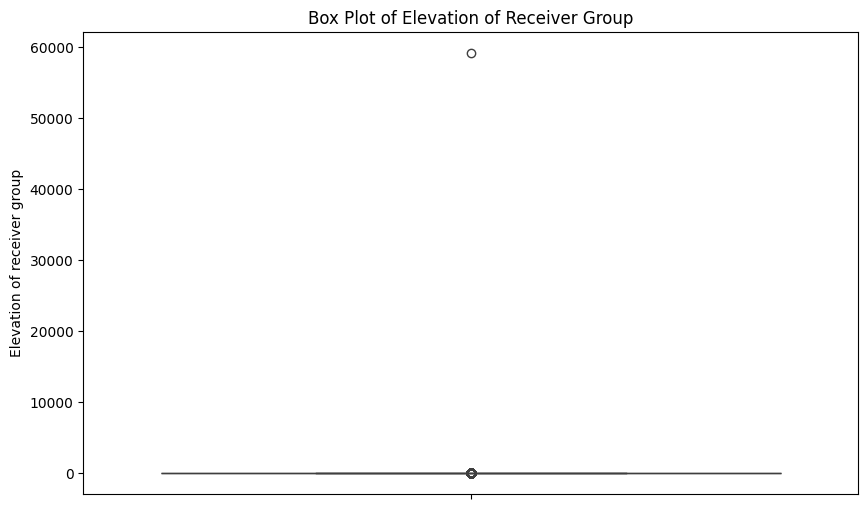

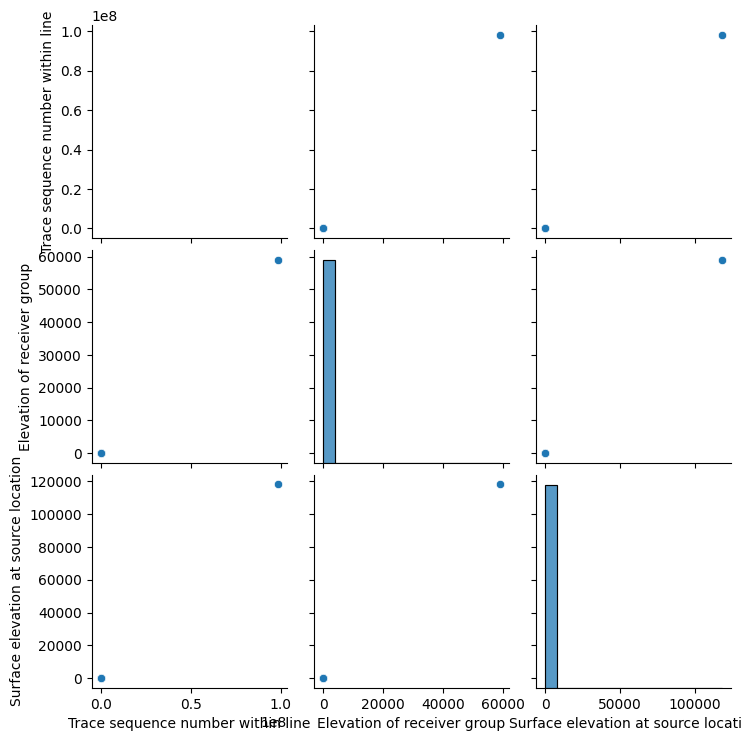

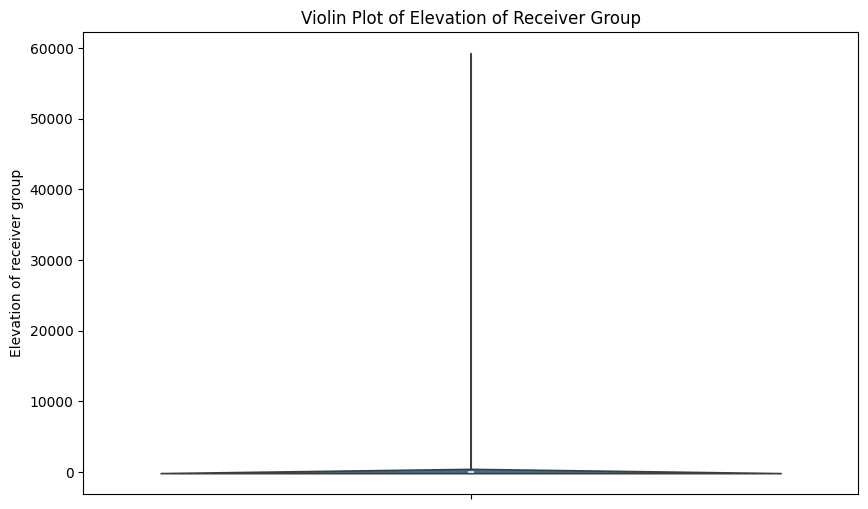

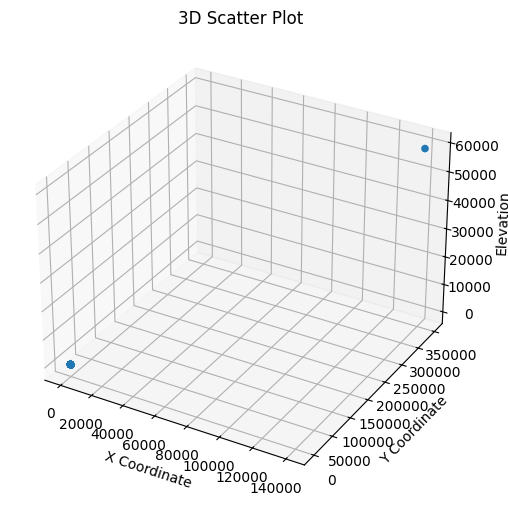

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel('D:/Computer Aplication/WorkPlacement/Projects/Project3/namss.F-12-89-HW.mcs.airgun/Data/TraceHeader.xlsx')

# Box Plot of Elevation of Receiver Group
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Elevation of receiver group'])
plt.title('Box Plot of Elevation of Receiver Group')
plt.show()

# Pair Plot
sns.pairplot(df[['Trace sequence number within line', 'Elevation of receiver group', 'Surface elevation at source location']])
plt.show()

# Violin Plot of Elevation of Receiver Group
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['Elevation of receiver group'])
plt.title('Violin Plot of Elevation of Receiver Group')
plt.show()

# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X coordinate of ensemble (CDP) position of this trace '], df['Y coordinate of ensemble (CDP) position of this trace '], df['Elevation of receiver group'])
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Elevation')
plt.title('3D Scatter Plot')
plt.show()


In [17]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Load the license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the CSV file
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project3/namss.F-12-89-HW.mcs.airgun/Data/output.csv'
df = pd.read_csv(file_path)

# Compute the histogram
hist, bin_edges = np.histogram(df['trace_value'], bins=50)

# Prepare data for the line chart
data = [( (bin_edges[i] + bin_edges[i + 1]) / 2, int(hist[i]) ) for i in range(len(hist))]

# Create a chart
chart = lc.ChartXY(
    theme=lc.Themes.Dark,
    title='Histogram of Seismic Trace Values'
)

# Add a line series to the chart
line_series = chart.add_line_series()
line_series.add(data)

# Add a logarithmic y-axis
chart.get_default_y_axis().dispose()
log_y_axis = chart.add_y_axis(axis_type='logarithmic')
log_y_axis.set_title('Frequency (log scale)')

# Set the x-axis title
chart.get_default_x_axis().set_title('Amplitude')

# Open the chart
chart.open()


127.0.0.1 - - [25/Jun/2024 14:25:06] "GET / HTTP/1.1" 200 -


In [23]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Load the license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the CSV file
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project3/namss.F-12-89-HW.mcs.airgun/Data/output.csv'
df = pd.read_csv(file_path)

# Compute the histogram
hist, bin_edges = np.histogram(df['trace_value'], bins=50)

# Apply logarithmic transformation to the histogram values
log_hist = np.log10(hist + 1)  # Adding 1 to avoid log(0)

# Prepare data for the line chart
data = [( (bin_edges[i] + bin_edges[i + 1]) / 2, log_hist[i] ) for i in range(len(hist))]

# Debugging step: Print the data to ensure it is correct
print("Data for the chart:")
for point in data:
    print(point)

# Create a chart
chart = lc.ChartXY(
    theme=lc.Themes.Dark,
    title='Histogram of Seismic Trace Values'
)

# Add a line series to the chart
line_series = chart.add_line_series()

# Debugging step: Print data before adding to the line series
for x, y in data:
    print(f"Adding point: ({x}, {y})")
    line_series.add((x, y))

# Add a logarithmic y-axis
chart.get_default_y_axis().dispose()
log_y_axis = chart.add_y_axis(axis_type='logarithmic')
log_y_axis.set_title('Frequency (log scale)')

# Set the x-axis title
chart.get_default_x_axis().set_title('Amplitude')

# Open the chart
chart.open()


Data for the chart:
(-0.96762993, 0.3010299956639812)
(-0.9264085900000001, 0.47712125471966244)
(-0.88518725, 0.3010299956639812)
(-0.8439659100000001, 0.6020599913279624)
(-0.80274457, 0.8450980400142568)
(-0.76152323, 1.255272505103306)
(-0.72030189, 1.1139433523068367)
(-0.67908055, 1.6020599913279623)
(-0.63785921, 1.954242509439325)
(-0.59663787, 2.1492191126553797)
(-0.55541653, 2.383815365980431)
(-0.51419519, 2.6748611407378116)
(-0.47297385, 2.9894498176666917)
(-0.43175251, 3.258397804095509)
(-0.39053117, 3.5035183127240748)
(-0.34930983, 3.745465168670727)
(-0.30808849, 3.993964998195119)
(-0.26686715, 4.216825423266047)
(-0.22564581, 4.439601083834346)
(-0.18442447, 4.658393026279124)
(-0.14320313, 4.918140469970513)
(-0.10198179000000002, 5.294836431137024)
(-0.06076045000000002, 5.923425886706086)
(-0.01953910999999997, 7.487589368951607)
(0.021682230000000025, 6.736997723240476)
(0.06290357000000002, 5.86758297008659)
(0.10412491000000001, 5.305104052181716)
(0.1453462

127.0.0.1 - - [25/Jun/2024 14:43:15] "GET / HTTP/1.1" 200 -


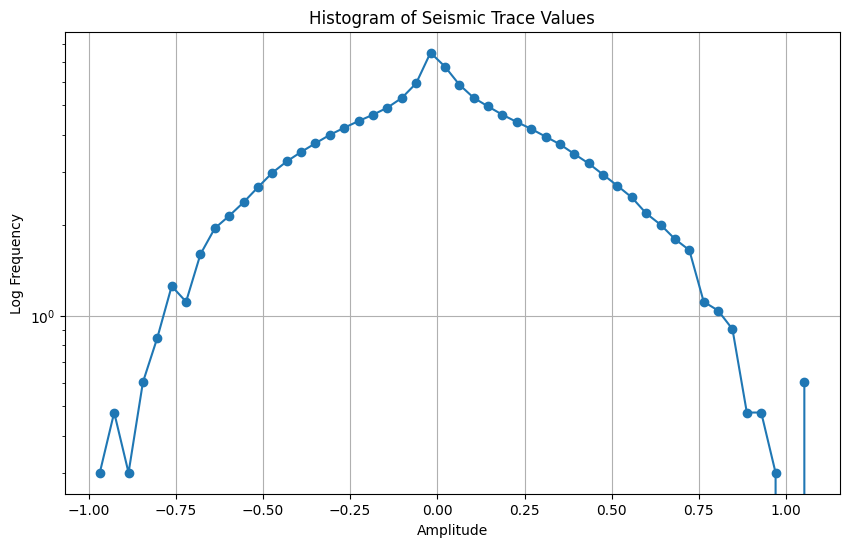

In [22]:
import matplotlib.pyplot as plt

# Prepare data for Matplotlib
x_values = [ (bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(hist)) ]
y_values = log_hist

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.yscale('log')
plt.xlabel('Amplitude')
plt.ylabel('Log Frequency')
plt.title('Histogram of Seismic Trace Values')
plt.grid(True)
plt.show()


In [1]:
import lightningchart as lc
import random


# Load the license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

chart = lc.ChartXY()

chart.get_default_y_axis().dispose() # dispose the default y-axis

for i in range(4):
    axis_y = chart.add_y_axis(stack_index=i) # increasing stack_index will create stacked axes
    axis_y.set_margins(15 if i > 0 else 0, 15 if i < 2 else 0) # optional margin space
    axis_y.set_title(title=str(i))
    series = chart.add_line_series(y_axis=axis_y, data_pattern= 'ProgressiveX')
    series.add(
        x=list(range(0, 250)),
        y=[random.random() for _ in range(250)]
    )

chart.open()

127.0.0.1 - - [26/Jun/2024 10:36:47] "GET / HTTP/1.1" 200 -


127.0.0.1 - - [26/Jun/2024 11:32:30] "GET / HTTP/1.1" 200 -
